In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
import json
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [2]:
def get_gc_trans_single_ret(df) -> list:
    gc_trans_1310 = []
    
    for i in range(len(df['wavelength'])):
        wavel = np.array(df['wavelength'][i])
        trans = df['transmission_ch1'][i]
        if len(trans) == 0:
            pass
        else:
            coefs = poly.polyfit(wavel, trans, 12)
            ffit = poly.Polynomial(coefs)
            gc_trans_1310.append(ffit(1310))
            
        # fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        # ax.plot(wavel, trans, label='measured')
        # ax.plot(wavel, ffit(wavel), '--', label='fitted')
        # ax.set_xlabel('Wavelength (nm)')
        # ax.set_ylabel('Transmission (dB)')
        # plt.show()
    
    return gc_trans_1310

{0: 0.04739154348184327, 1: 0.009284360240608672, 10: 0.008200318251802497, 11: 0.03575743499823242, 12: 0.049865957016803755, 13: 0.09848928043551355, 14: 0.015015205868717612, 15: 0.019335752514430694, 16: 0.011009586439906871, 17: 0.0386405355142682, 18: 0.028717939523398673, 19: 0.01849822277731732, 2: 0.006184958862700522, 20: 0.04312281078460961, 21: 0.027679846342923108, 22: 0.03248939730778626, 23: 0.09968019319884591, 24: 0.0658307790645909, 25: 0.11706867500171057, 26: 0.04979080011962541, 27: 0.09722459738114404, 28: 0.04025468959196632, 29: 0.013894361582588496, 3: 0.004437634563154613, 30: 0.028927532319801864, 31: 0.005303262829262819, 32: 0.007206618065496209, 33: 0.05203460530635441, 34: 0.03999259676310672, 35: 0.007117670176081508, 36: 0.017304555983082472, 37: 0.035498629197683235, 38: 0.08480971788237199, 39: 0.03286575360606544, 4: 0.008005963836273961, 40: 0.03080630590260251, 41: 0.05041037517938864, 42: 0.033883626553226576, 43: 0.02172862936857389, 44: 0.020615

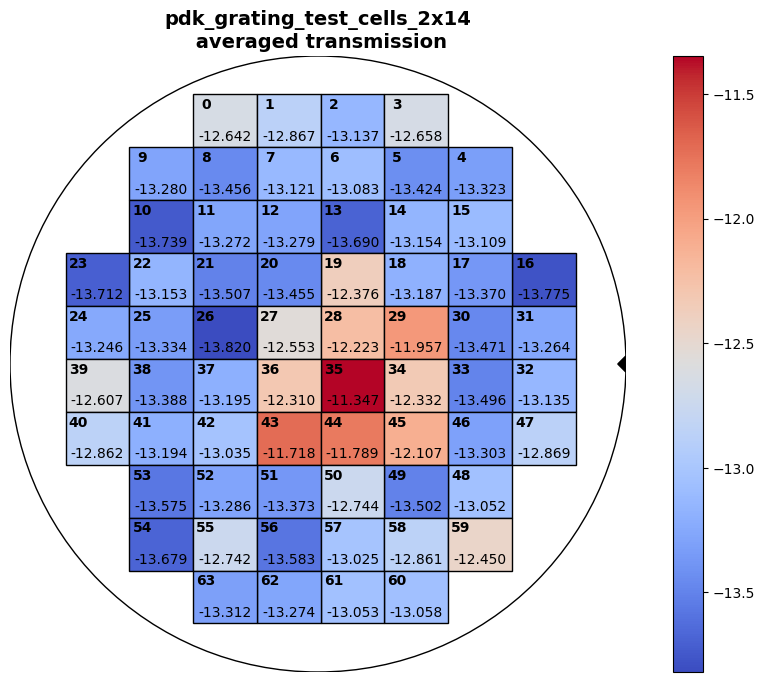

In [5]:
# GC loss variation
p_current = Path().resolve().parent
root = p_current / 'results' / 'BO_wafer3_data' /'pdk_grating_test_cells_2x14_BO_wafer3'

gc_trans_var = {}
gc_trans_avg = {}
gc_trans = []
gc_trans_all = {}

data_dir_gen = sorted(root.glob('reticle*/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = int(df['reticle'][0])
    gc_trans_single_ret = get_gc_trans_single_ret(df)
    gc_trans_avg[ret] = np.average(gc_trans_single_ret)
    gc_trans_var[ret] = np.var(gc_trans_single_ret)
    gc_trans += gc_trans_single_ret
    gc_trans_all[ret] = gc_trans_single_ret

print(gc_trans_var)
print(np.var(gc_trans))

# with open(root / f'gc_trans_avg.json', 'w') as fp:
#         json.dump(gc_trans_avg, fp)

# get a wafer plot
cell_name = df['test_cell'][0]
draw_wafer_plot(data=gc_trans_avg, title=f'{cell_name}\n averaged transmission')

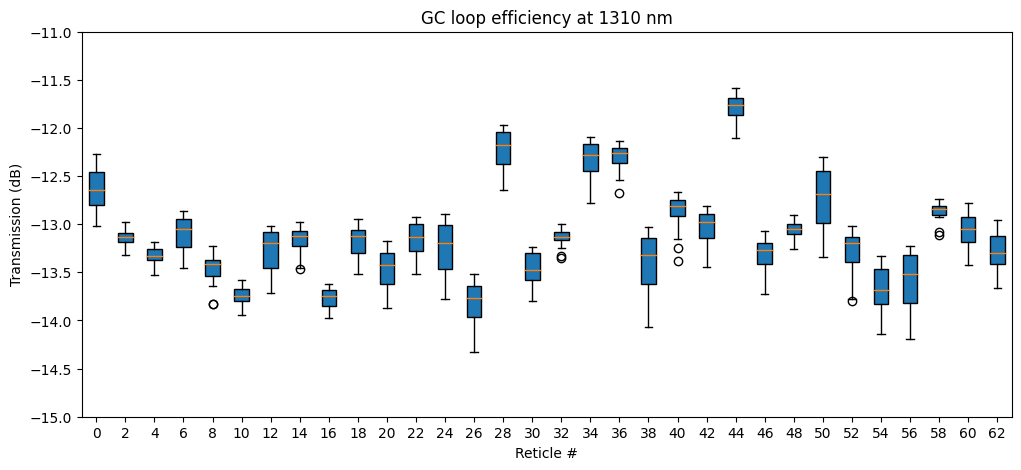

In [20]:
# Create a boxplot
sorted_dict = {key:gc_trans_all[key] for key in sorted(gc_trans_all.keys())}
data = list(sorted_dict.values())[::2]
labels = list(sorted_dict.keys())[::2]
fig, ax = plt.subplots(1, 1, figsize=[12, 5])
ax.boxplot(data, patch_artist=True, labels=labels)

# Add title and labels to the plot
ax.set_title('GC loop efficiency at 1310 nm')
ax.set_ylim([-15, -11])
ax.set_xlabel('Reticle #')
ax.set_ylabel('Transmission (dB)')

# Show the plot
plt.show()